<a href="https://www.kaggle.com/code/hikmatullahmohammadi/reservation-cancellation-simple-dnn-tf-keras?scriptVersionId=120217842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='0'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    Kaggle PS,S3,Ep7 | Reservation Cancellation Prediction | Keras | DNN</h1>


<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Easy Navigation</h1>
    <li><a href='#1' style='color: black;text-decoration:underline'>
        1- Data Exploration</a>
    </li>
    <li>
        <a href='#2' style='color: black;text-decoration:underline'>
          2- Explanatory Data Analysis (EDA)</a>
          <ul>
            <li><a href='#2-1' style='color: black;text-decoration:underline'>
                2.1- Categorical features</a>
            </li>
            <li><a href='#2-2' style='color: black;text-decoration:underline'>
                2.2- Numerical features</a>
            </li>
          </ul>
    </li>
    <li><a href='#3' style='color: black;text-decoration:underline'>
    3- Data preprocessing</a>
    </li>
    <li>
        <a href='#4' style='color: black;text-decoration:underline'>
            4- Modeling (DNN)</a>
            <ul>
              <li><a href='#4-1' style='color: black;text-decoration:underline'>
                  4.1- Model Construction</a>
              </li>
              <li><a href='#4-2' style='color: black;text-decoration:underline'>
                  4.2-  Model Utilization & Submission</a>
              </li>
            </ul>
    </li>
  <div>

<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Dataset Description:</h1>
  <p>Customer behavior and booking possibilities have been radically changed by online hotel
    reservation channels. Cancellations or no-shows cause a significant number of hotel reservations
    to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts,
    changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which
    is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.
  </p>
  <p>
    As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer
    is going to honor the reservation or cancel it?
  </p>

  <b>This data frame contains the following columns:</b>
  <ul>
      <li><b>Booking_ID:</b> unique identifier of each booking</li>
  <li><b>No of adults:</b> Number of adults</li>
  <li><b>No of children:</b> Number of Children</li>
  <li><b>noofweekend_nights:</b> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel</li>
  <li><b>noofweek_nights</b>: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel</li>
  <li><b>typeofmeal_plan:</b> Type of meal plan booked by the customer:</li>
  <li><b>requiredcarparking_space:</b> Does the customer require a car parking space? (0 - No, 1- Yes)</li>
  <li><b>roomtypereserved:</b> Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.</li>
  <li><b>lead_time:</b> Number of days between the date of booking and the arrival date</li>
  <li><b>arrival_year:</b> Year of arrival date</li>
  <li><b>arrival_month:</b> Month of arrival date</li>
  <li><b>arrival_date:</b> Date of the month</li>
  <li><b>Market segment type:</b> Market segment designation.</li>
  <li><b>repeated_guest:</b> Is the customer a repeated guest? (0 - No, 1- Yes)</li>
  <li><b>noofprevious_cancellations:</b> Number of previous bookings that were canceled by the customer prior to the current booking</li>
  <li><b>noofpreviousbookingsnot_canceled:</b> Number of previous bookings not canceled by the customer prior to the current booking</li>
  <li><b>avgpriceper_room:</b> Average price per day of the reservation; prices of the rooms are dynamic. (in euros)</li>
  <li><b>noofspecial_requests:</b> Total number of special requests made by the customer (e.g. high floor, view from the room, etc)</li>
  <li><b>booking_status:</b> Flag indicating if the booking was canceled or not.</li>
  </ul>
</div>

<a id='1'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
1- Data Exploration
</h1>


In [1]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [2]:
# load the datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv', index_col=0)
df_orig = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/train__dataset.csv')

In [3]:
print(f'Training set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
print(f'Original dataset shape: {df_orig.shape}')

Training set shape: (42100, 18)
Test set shape: (28068, 17)
Original dataset shape: (18137, 18)


In [4]:
df_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
# combine with the original dataset
df_train = pd.concat([df_train, df_orig])
df_train.index = np.arange(df_train.shape[0])
df_train.shape

(60237, 18)

In [6]:
# look for missing values
df_train.isnull().sum().sum()

0

<a id='2'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    2- Explanatory Data Analysis (EDA)</h1>

<div style='padding:10px; background:lightgreen;;border-radius:10px'>
In this section, we will first look at the distributions of categorical variables, and then we will visualize how the numeric features are distributed.
    </div>

In [7]:
# extract categorical and numerical features
cate_features = [
    'no_of_adults',
    'no_of_children',
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'market_segment_type',
    'repeated_guest',
    'no_of_special_requests',
    'booking_status'
    
]
numeric_features = list(set(df_train.columns)  - set(cate_features))


<p style='background: orange; color: black; padding: 10px'><b>Please note that some of the features are not necessarily categorical in their essence, but in this particular dataset we consider them categorical since they have limited values e.g. no_of_adults has values of 0, 1, 2, 3 or 4, so we consider this a categorical variable although it is a numeric variable otherwise.<\b><\p>

In [8]:
# Utils

# draw a countplot of a categorical variable along with
# how it effects the target variable which is in this case 'booking_status'
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.countplot(df[feature], hue=df['booking_status'])
    ax.set_title(f'{feature} counts vs Booking status', fontdict={'fontsize': 18})

# display tabular relationship between a numeric feature and booking_status
def display_tabular_relationship_cate_target(df, feature):
    display(pd.crosstab(
        index=df['booking_status'],
        columns=df[feature],
        normalize='columns'
    ))
    
# draw distribution plot for a numeric feature
def draw_numeric_dist(df, feature):
    sns.kdeplot(df[feature]) 
    ax = sns.distplot(df[feature])
    ax.set_title(f'{feature} Distribution', fontdict={'fontsize': 18})

# draw boxen plot for a numeric feature vs booking_status
def draw_numeric_target_boxen(df, feature):
    ax = sns.boxenplot(data=df, x='booking_status', y=feature)
    ax.set_title(f'{feature} VS Booking status', fontdict={'fontsize': 18})

<a id='2-1'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
2.1- Categorical variables</h2>

<h3 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
2.1.1- Categorical variables counts/distributions    
</h3>

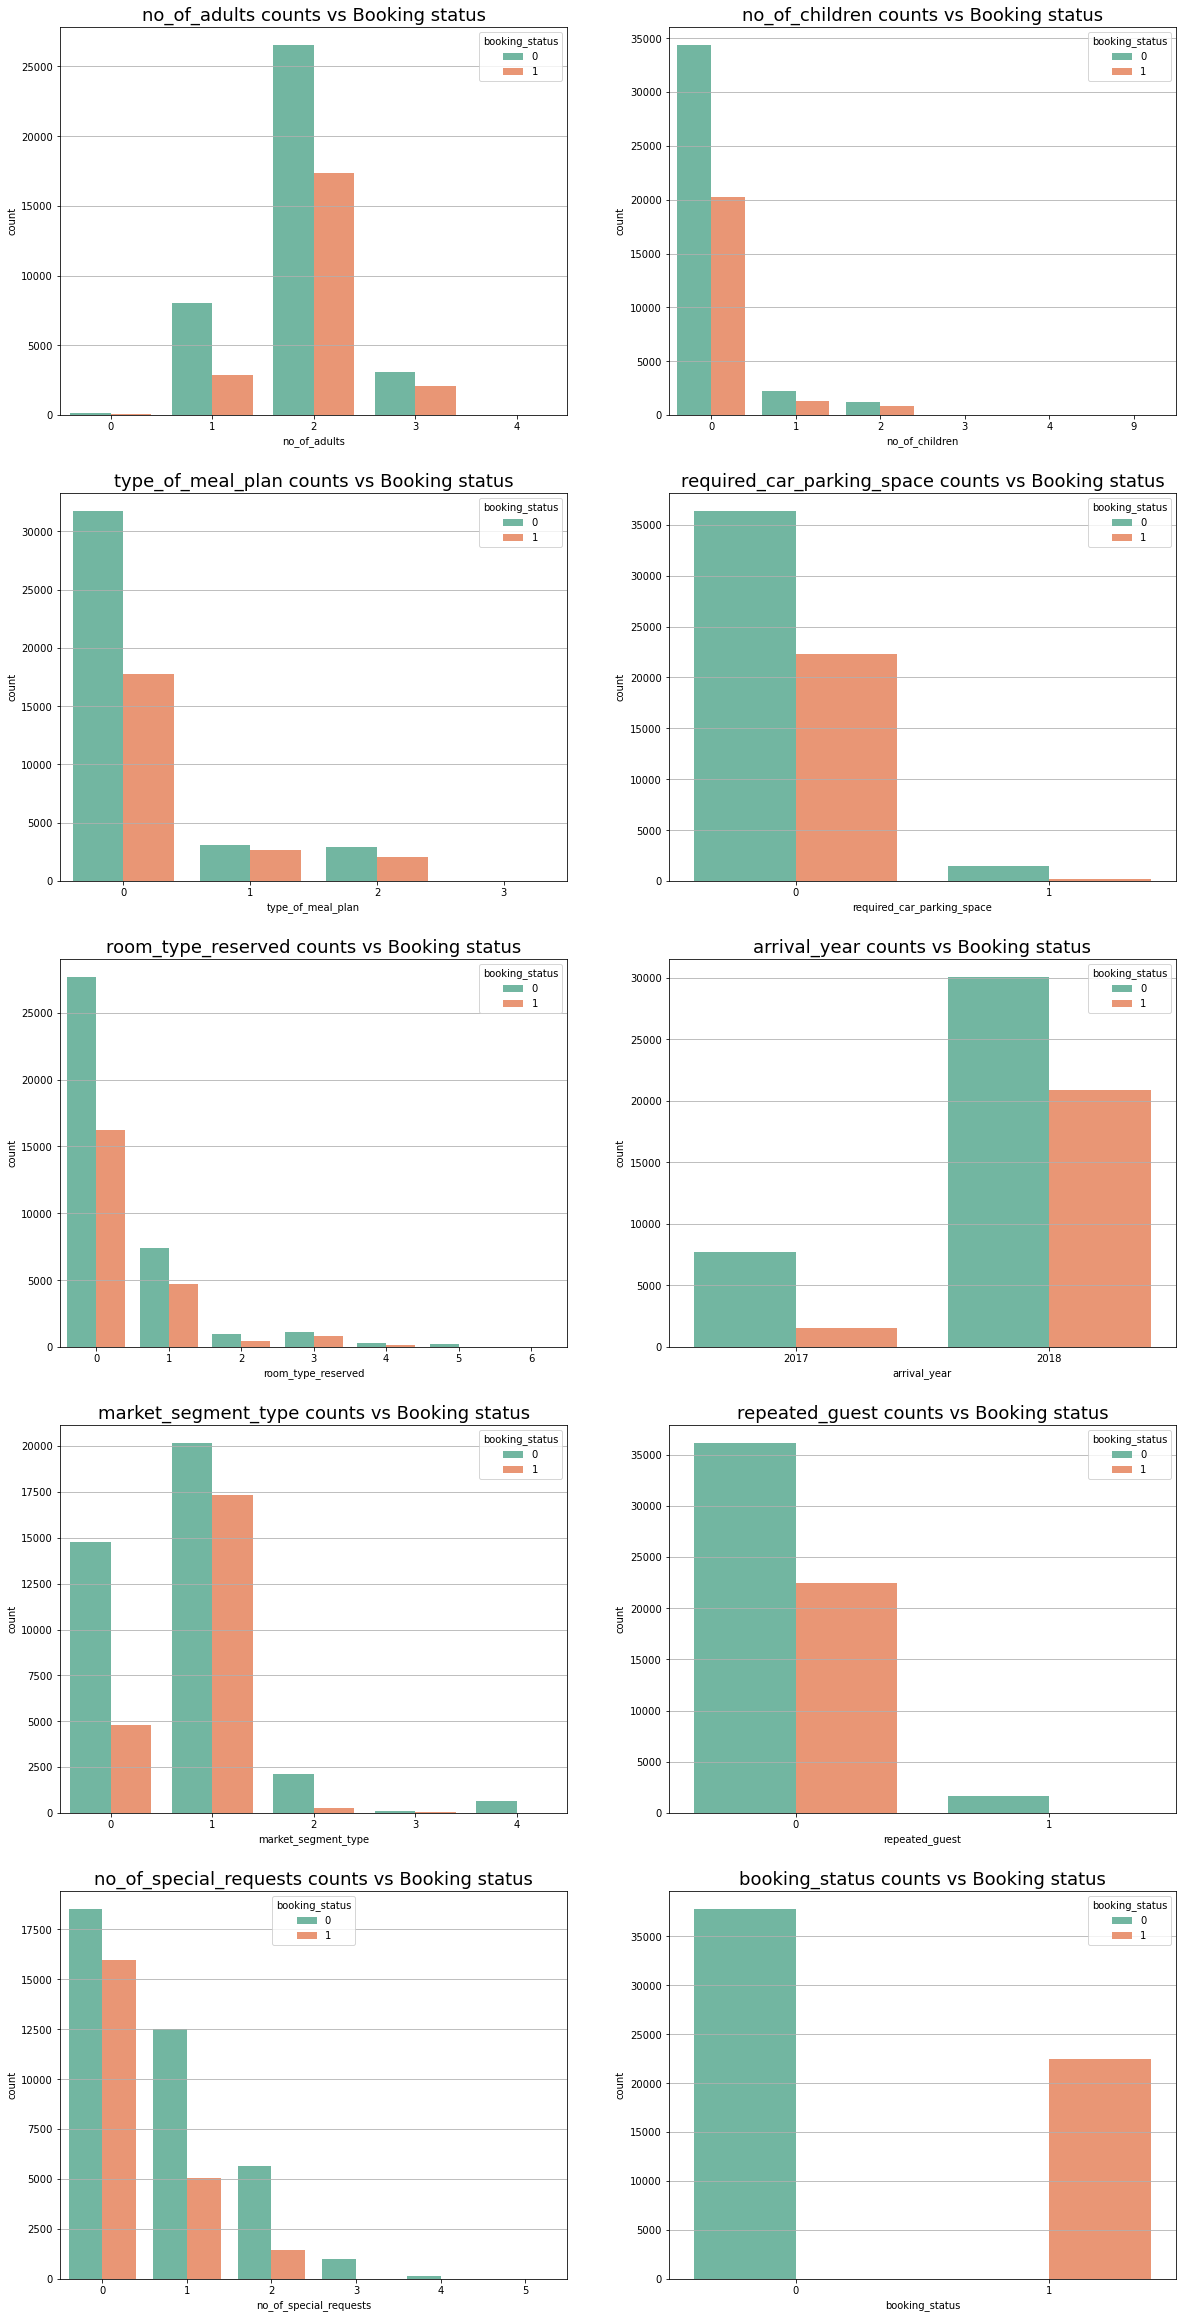

In [9]:
# draw the counts/distributions of categorical features vs the target variable
plt.figure(figsize=(20, 50))
sns.set_palette('Set2')

for i, feature in enumerate(cate_features):
    plt.subplot(len(cate_features)//2+1, 2, i+1)
    draw_cate_vs_target(df_train, feature)
plt.show()  

**Insights:**<br>
::TODO in the next version

<h3 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    2.1.2- Categorical variables tabular relationships [vs target variable]</h3>

<div style='padding:10px; background:lightgreen;color:black;border-radius:10px;'>
    <p>
    Using Tabular Relationships, displayed in charts, we can clearly see how categorical varibles are distributed, and how is the target variable effected by the distribution of a categorical variable.</p>
    <p>
In this section I will not clutter the notebook by explaining all the charts. Rather, I will explain bellow only one chart as an example in order for you to understand what the charts can tell you. That is a consequence of the clarity of the tabular relations' charts. So you can see and interpret rest of the charts yourself.
</p>
    </div>

In [10]:
# type of meal plan
display_tabular_relationship_cate_target(df_train, 'type_of_meal_plan')

type_of_meal_plan,0,1,2,3
booking_status,,,,
0,0.641479,0.541978,0.585933,0.888889
1,0.358521,0.458022,0.414067,0.111111


<div style='padding:10px; background:lightgreen;color:black;border-radius:10px;'>
  <b>The chart tells us the followings:</b>
  <ul>
    <li>
      64.1% of reservations with a type_of_meal_plan of 0 resulted in cancellation, and the rest 35.8% of them resulted in cancellation.
    </li>
    <li>
      54.2% of reservations with a type_of_meal_plan of 1 resulted in cancellation, and the rest 45.8% of them did not result in cancellation.
    </li>
    <li>
      58.6% of reservations with a type_of_meal_plan of 2 resulted in cancellation, and the rest 41.4% of them did not result in cancellation.
    </li>
    <li>
      88.89% of reservations with a type_of_meal_plan of 3 resulted in cancellation, and only 11.11% of them did not result in cancellation.
    </li>
  </ul>  
  <b>Reservations with a type_of_meal_plan of 3 has the highest chance of cancellation, whereas those with a type_of_meal_plan 0 has the lowest probability of cancellation.</b>
</div>


In [11]:
# display all tabular relationships charts of categorical variables vs the target variable
for i, feature in enumerate(cate_features):
    print(i+1, '-'*50)
    display_tabular_relationship_cate_target(df_train, feature)
    print('\n\n\n')

1 --------------------------------------------------


no_of_adults,0,1,2,3,4
booking_status,,,,,
0,0.645299,0.73463,0.604239,0.597006,0.631579
1,0.354701,0.26537,0.395761,0.402994,0.368421






2 --------------------------------------------------


no_of_children,0,1,2,3,4,9
booking_status,,,,,,
0,0.629351,0.622636,0.580998,0.814815,0.8,0.75
1,0.370649,0.377364,0.419002,0.185185,0.2,0.25






3 --------------------------------------------------


type_of_meal_plan,0,1,2,3
booking_status,,,,
0,0.641479,0.541978,0.585933,0.888889
1,0.358521,0.458022,0.414067,0.111111






4 --------------------------------------------------


required_car_parking_space,0,1
booking_status,,
0,0.619795,0.898595
1,0.380205,0.101405






5 --------------------------------------------------


room_type_reserved,0,1,2,3,4,5,6
booking_status,,,,,,,
0,0.629959,0.610143,0.67661,0.5838,0.733634,0.857678,0.666667
1,0.370041,0.389857,0.32339,0.4162,0.266366,0.142322,0.333333






6 --------------------------------------------------


arrival_year,2017,2018
booking_status,,
0,0.833047,0.589811
1,0.166953,0.410189






7 --------------------------------------------------


market_segment_type,0,1,2,3,4
booking_status,,,,,
0,0.755372,0.5375,0.883962,0.766917,0.989062
1,0.244628,0.4625,0.116038,0.233083,0.010937






8 --------------------------------------------------


repeated_guest,0,1
booking_status,,
0,0.616962,0.989311
1,0.383038,0.010689






9 --------------------------------------------------


no_of_special_requests,0,1,2,3,4,5
booking_status,,,,,,
0,0.536969,0.713046,0.796362,0.994914,1.0,1.0
1,0.463031,0.286954,0.203638,0.005086,0.0,0.0






10 --------------------------------------------------


booking_status,0,1
booking_status,,
0,1.0,0.0
1,0.0,1.0


---

<a id='2-2'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
    2.2- Numerical features</h2>

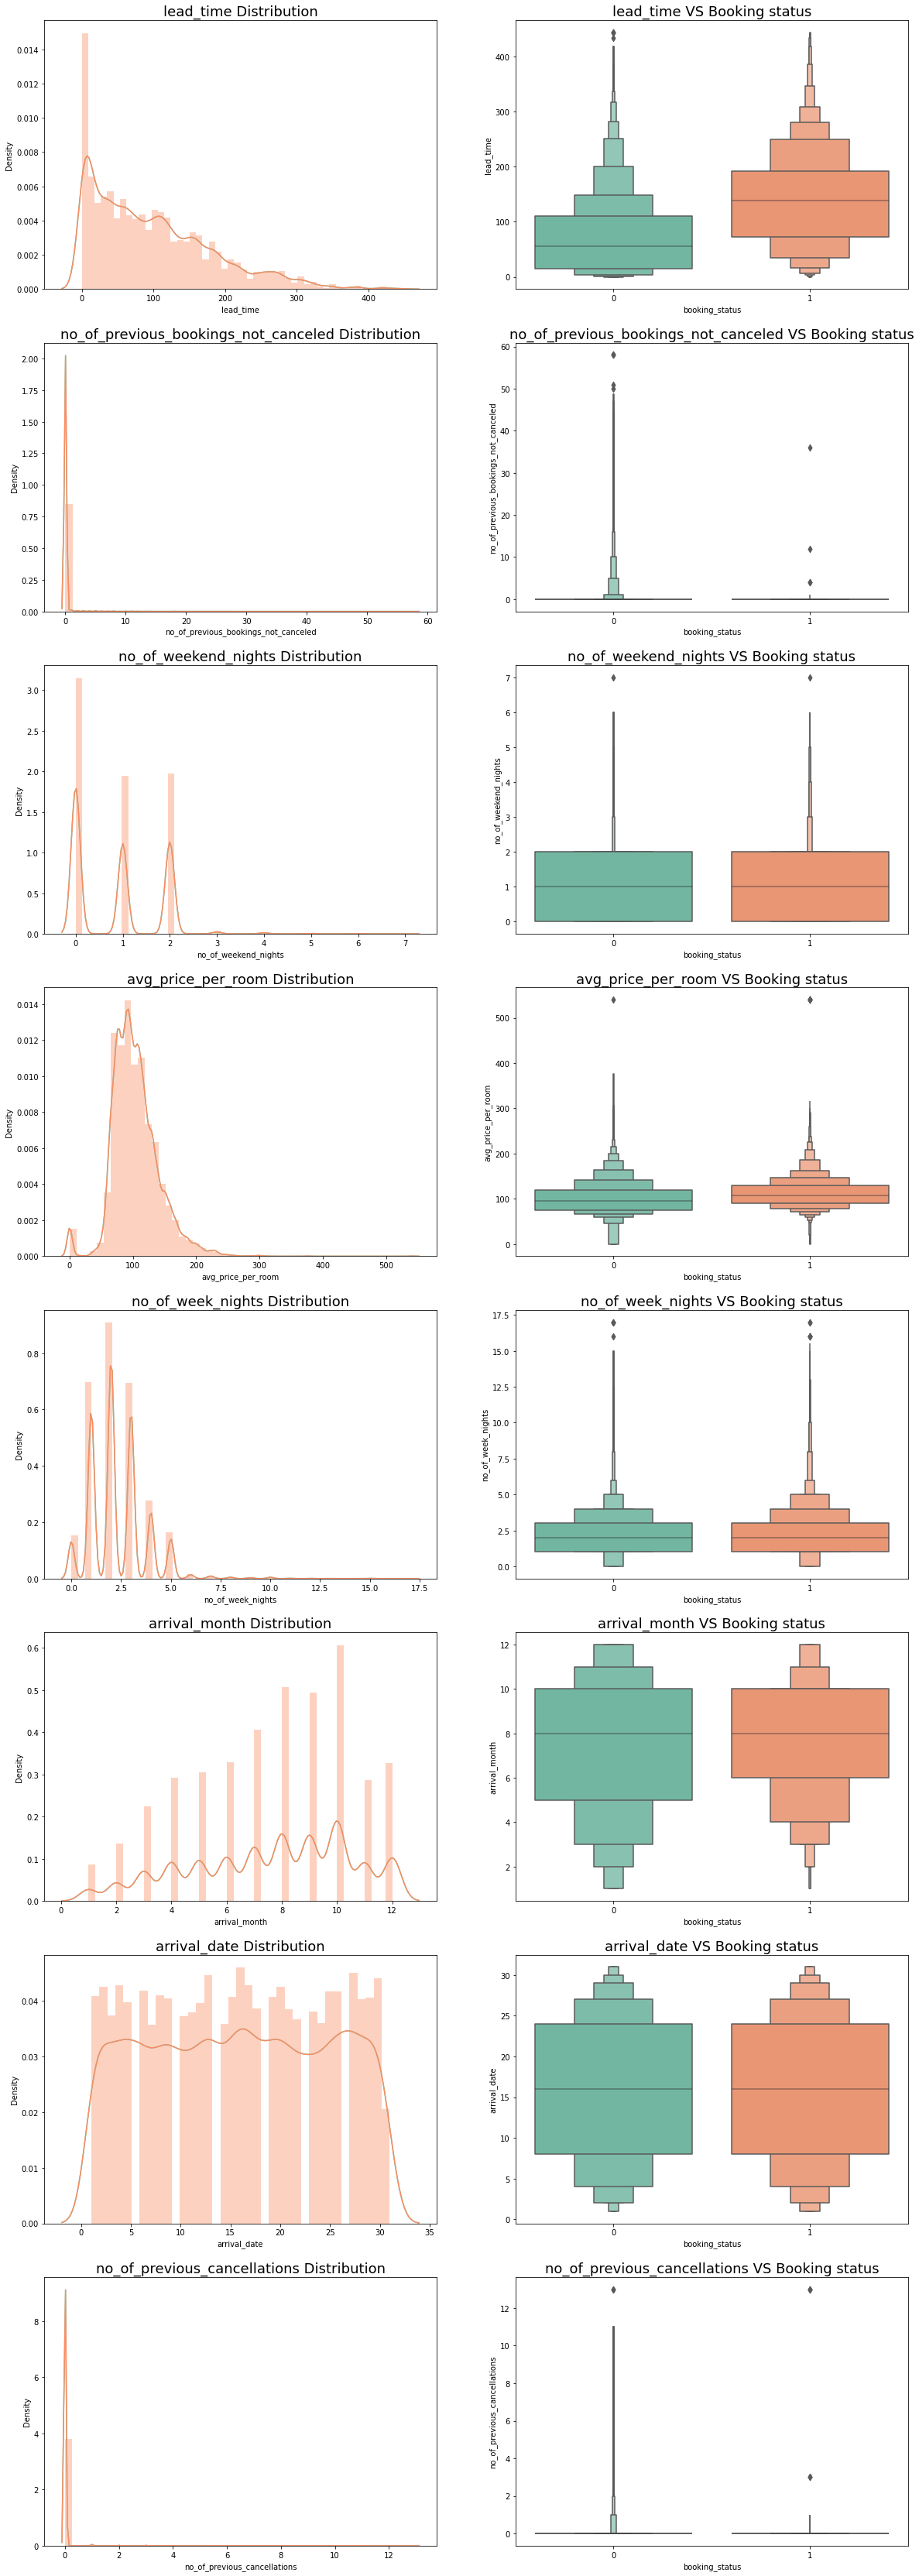

In [12]:
# draw some plots for all numeric features [+ vs booking_status]
plt.figure(figsize=(20, 60))
sns.set_palette('Set2')

i = 1
for feature in numeric_features:
    # dist
    plt.subplot(len(numeric_features), 2, i)
    draw_numeric_dist(df_train, feature)
    # box
    plt.subplot(len(numeric_features), 2, i+1)
    draw_numeric_target_boxen(df_train, feature)
    i += 2
    
plt.show()

<p style='padding: 10px; color:black; background: lightgreen;border-radius:10px'>
    There are seems to be some extreme outlier values in <b>no_of_previous_cancellations</b> , <b>no_of_previous_bookings_not_canceled</b>, <b>avg_price_per_room</b>, <b>no_of_weeken_nights</b> and <b>no_of_week_nights</b> features, which we will handle in the next section.
</p>

---

<a id='3'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
3- Preprocessing
</h1>

<div style='padding:10px; background:lightgreen;color:black;border-radius:10px;'>
   In this section, we will first handle outliers, then we will preprocess data to make it ready for <i>Keras</i> models.
    </div>

<div style='padding:10px; background:lightblue;color:black;border-radius:10px'>
  <h3>Handling Outliers</h3>
<p>
  Here, we will use <b>IQR</b> tecknique to detect outliers in some features of the dataset. <b>It is defined as the difference between the 75th and 25th percentiles of the data.</b>
  That is, every value which is out of this range (25th-75th percentiles) is considered outlier.
</p>
<p>
  The image bellow from  <a href="https://www.baeldung.com">https://www.baeldung.com</a> can clearly explain <b>IQR</b>.
  <hr>
  <img src="https://www.baeldung.com/wp-content/uploads/sites/4/2021/12/outliers-detection-boxplot.drawio-1.png" alt="iqr">
</p>
<b>All values which lay out of the range <b>(1st Quartile - 3rd Quartile)</b> are considered outliers/extreme values.</b>
</div>

In [13]:
# the function to replace outliers with nan
def replace_outliers_with_nan_iqr(df, feature, inplace=False):
    desired_feature = df[feature]
    
    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [14]:
# let's see how the features are distributed
df_train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000
mean,1.898451,0.130983,0.862493,2.341086,0.263061,0.027176,0.401182,98.314591,2017.845577,7.545130,15.830038,0.751897,0.027956,0.020536,0.168435,104.238935,0.585521,0.372628
std,0.523373,0.438391,0.882668,1.429660,0.601555,0.162597,0.816168,83.210861,0.361357,2.907078,8.854501,0.638291,0.164849,0.339763,1.726747,36.648888,0.779224,0.483508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,81.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,150.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,122.400000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [15]:
# features_with_outlier: we can learn this from the above chart, and also from EDA as I mentioned there
features_with_outlier = [
    'lead_time',
    'no_of_previous_cancellations',
    'avg_price_per_room',
    'no_of_previous_bookings_not_canceled',
    'no_of_week_nights',
    'no_of_weekend_nights'
]
 

In [16]:
# training set
# handle the outliers in training set: replace them by the mean of each feature

# get means
features_means = df_train[features_with_outlier].mean()
# iterate through continuous features
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(df_train, i, inplace=True)

# replace np.nan by the mean values
df_train.fillna(features_means, inplace=True)
df_train.isnull().sum().sum()

0

In [17]:
# test set
# handle the outliers in test set: replace them by the mean of each feature

# get means
features_means = df_test[features_with_outlier].mean(axis=0)
# iterate through continuous features
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(df_test, i, inplace=True)

# replace np.nan by the mean values
df_test.fillna(features_means, inplace=True)
df_test.isnull().sum().sum()

0

In [18]:
# separate features from the target variable
X = df_train.drop('booking_status', axis=1)
y = df_train['booking_status']

In [19]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df_test = scaler.fit_transform(df_test)

In [20]:
# split the dataset into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=100, test_size=0.1, shuffle=True)

In [21]:
# define the training and the test sets
training_set = tf.data.Dataset.from_tensors((X_train, y_train))
val_set = tf.data.Dataset.from_tensors((X_val, y_val))
test_set = tf.data.Dataset.from_tensors((df_test,))

from IPython.display import clear_output
clear_output()

In [22]:
# define batches
training_batches = training_set.batch(1024)
val_batches = val_set.batch(1024)
test_batches = test_set.batch(1024)

---

<a id='4'></a>
<h1 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
4- Modeling
</h1>

<a id='4-1'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
4.1- Training
</h2>

<div style='padding:10px; background:lightgreen;color:black;border-radius:10px'>
  <p>
    We will use Keras functional model so that we can have more than one output. We will have two outputs both of which are the probabilities of the booking status to be 1. Finally, we will compute the mean of them to finalize the prediction.
  </p>
  <p>
    <b>Dropout() & GaussianNoise() layers are for regularization: to prevent from overfitting.</b>
  </p>
</div>

In [23]:
# Build the model
def build_model(input_shape):
    # input layer
    inputs =  keras.Input(shape=input_shape)
    
    # batch normalization
    bn = layers.BatchNormalization()(inputs)
    
    # hidden layers
    x1 = layers.Dense(512, activation='relu')(bn)
    x1 = layers.Dropout(.5)(x1)
    x2 = layers.Dense(512, activation='relu')(bn)
    x2 = layers.Dropout(.5)(x2)
    
    gn1 = layers.GaussianNoise(.1)(x1)
    gn2 = layers.GaussianNoise(.1)(x2)
    x1 = layers.Dense(256, activation='relu')(gn1)
    x1 = layers.Dropout(.5)(x1)
    x2 = layers.Dense(300, activation='relu')(gn2)
    x2 = layers.Dropout(.6)(x2)
    
    gn1 = layers.GaussianNoise(.1)(x1)
    gn2 = layers.GaussianNoise(.1)(x2)
    x1 = layers.Dense(128, activation='relu')(gn1)
    x1 = layers.Dropout(.2)(x1)
    x2 = layers.Dense(112, activation='relu')(gn2)
    x2 = layers.Dropout(.2)(x2)
    
    gn1 = layers.GaussianNoise(.08)(x1)
    gn2 = layers.GaussianNoise(.07)(x2)
    x1 = layers.Dense(64, activation='relu')(gn1)
    x2 = layers.Dense(96, activation='relu')(gn2)
    
    x1 = layers.Dense(32, activation='relu')(x1)
    x2 = layers.Dense(32, activation='relu')(x2)
    
    x1 = layers.Dense(16, activation='relu')(x1)
    x2 = layers.Dense(16, activation='relu')(x2)
    
    # output layer
    output1 = layers.Dense(1, activation='sigmoid', name='Y-1')(x1)
    output2 = layers.Dense(1, activation='sigmoid', name='Y-2')(x2)
    
    return keras.Model(inputs, outputs=[output1, output2])

model = build_model(input_shape=(None, 17))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 17)]   0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, 17)     68          input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, None, 512)    9216        batch_normalization[0][0]        
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, None, 512)    9216        batch_normalization[0][0]        
______________________________________________________________________________________________

In [24]:
'''
In simple words, Focal Loss (FL) is an improved version of Cross-Entropy Loss (CE)
that tries to handle the class imbalance problem by assigning more weights
to hard or easily misclassified examples
'''
from keras import backend as K
# binary_focal_loss
def binary_focal_loss(gamma = 2., alpha = .25):
    def tf_binary_focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        epsilon = K.epsilon()
        pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
        pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return tf_binary_focal_loss_fixed


# categorical focal loss
def categorical_focal_loss(gamma = 2., alpha = .25):
    def tf_categorical_focal_loss_fixed(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
        return K.sum(loss, axis=1)
    return tf_categorical_focal_loss_fixed

In [25]:
# compile and train the model
model.compile(
    optimizer='Adam',
    loss=binary_focal_loss(),
    metrics=[tf.metrics.AUC()]
)

EPOCHS = 3000
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=0,
    patience=200, # number of epochs after which to stop if the loss does'nt change
    mode='min',
    restore_best_weights=True 
)

history = model.fit(training_batches, validation_data=val_batches, epochs=EPOCHS, callbacks=[early_stopping], verbose=0)

# clear the outputs/wornings
from IPython.display import clear_output
clear_output()

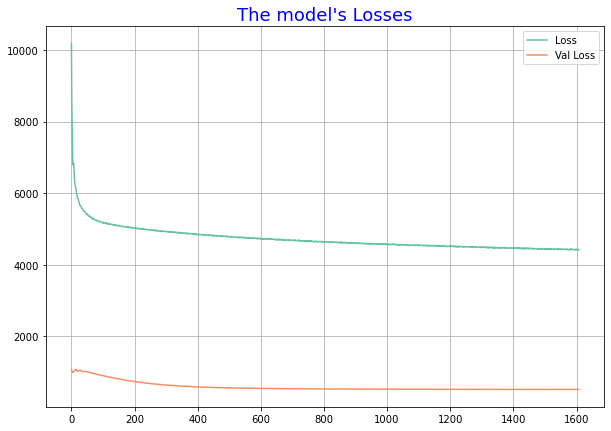

In [26]:
# let's plot the losses
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'])
plt.grid(True)
plt.title('The model\'s Losses', fontdict={'fontsize': 18, 'color': 'blue'})
plt.show()

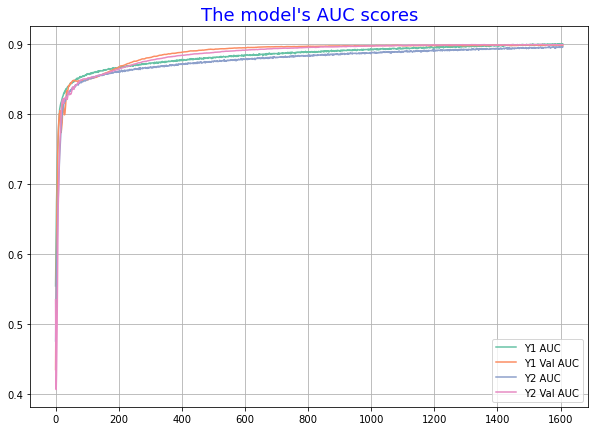

In [27]:
# let's plots the auc scores

# get auc scores from history object
y_1_auc_score, y_1_val_score = list(history.history.keys())[3], list(history.history.keys())[8]
y_2_auc_score, y_2_val_score = list(history.history.keys())[4], list(history.history.keys())[9]

plt.figure(figsize=(10, 7))

plt.plot(history.history[y_1_auc_score])
plt.plot(history.history[y_1_val_score])
plt.plot(history.history[y_2_auc_score])
plt.plot(history.history[y_2_val_score])

plt.grid(True)
plt.legend(['Y1 AUC', 'Y1 Val AUC', 'Y2 AUC', 'Y2 Val AUC'])
plt.title('The model\'s AUC scores', fontdict={'fontsize': 18, 'color': 'blue'})
plt.show()

<a id='4-2'></a>
<h2 style='padding:20px; background:lightblue;color:black;border-radius:10px'>
   4.2- Prediction & Submission 
    </h2>

In [28]:
# predict on the test set
test_preds = np.array(model.predict(test_batches))

'''
Note that the model predicts two outputs both of which are booking_status
but they are predicted using different architectures.
We will use the mean of them to finalize the submission file.
''' 
# mean
preds = test_preds.reshape(2, 28068).mean(axis=0)
preds.shape

(28068,)

In [29]:
# create submission file
sub = pd.read_csv('/kaggle/input/playground-series-s3e7/sample_submission.csv')
sub['booking_status'] = preds
sub.head()

,id,booking_status
0,42100,0.298786
1,42101,0.230655
2,42102,0.378014
3,42103,0.298321
4,42104,0.396634


In [30]:
# write to submission file
sub.to_csv('./submission.csv', index=False)
print('Done...')

Done...


<div style='padding:20px; background:lightblue;color:black;border-radius:10px'>
  <h1>Thanks :)</h1>
  <p>
    By: <br>
    <a href="https://kaggle.com/hikmatullahmohammadi">Hikmatullah Mohammadi</a>
  </p>
  <p><a href="#0">Go to top</a></p>
</div>